In [1]:
from PIL import Image
import pytesseract

In [2]:
#pip install pytesseract

In [3]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [4]:
image = Image.open(r'C:\Users\hp\project to update\RAI software\Task1\image13.jpg')

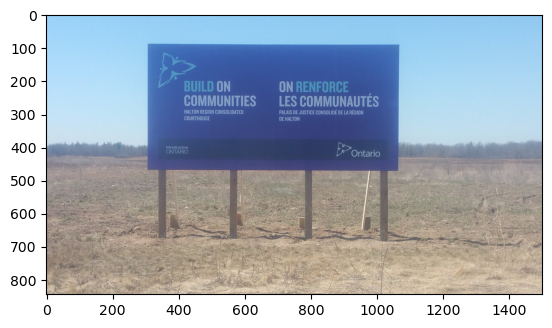

In [5]:
from matplotlib import pyplot as plt
plt.imshow(image) 

# Perform OCR on the image

In [6]:
text = pytesseract.image_to_string(image) 

# print text from the images

In [8]:
print("Extracted Text:")
print(text)

Extracted Text:
ON
LES COMMUNAUTES

HALTON REGION CONSOLIDATED PALAIS DE JUSTICE CONSOLIDE DE LA REGION
COURTHOUSE DEHALTON

pes
5 :
eo iF Ontario




In [9]:
import easyocr 
import cv2 
import numpy as np 

In [10]:
#! pip install easyocr

# read image

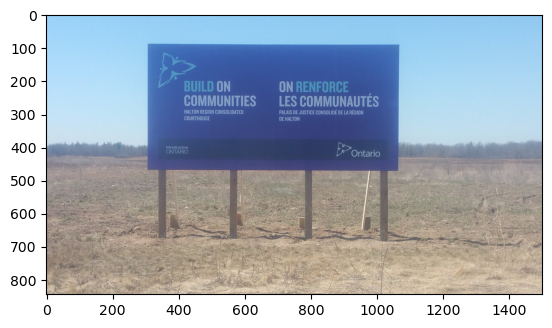

In [11]:
image = Image.open(r'C:\Users\hp\project to update\RAI software\Task1\image13.jpg')
plt.imshow(image) 

In [12]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(image)
result

Using CPU. Note: This module is much faster with a GPU.


[([[410, 194], [564, 194], [564, 242], [410, 242]],
  'BUILD ON',
  0.9930842218631502),
 ([[700, 196], [922, 196], [922, 244], [700, 244]],
  'ON RENFORCE',
  0.9962038140181194),
 ([[409, 235], [642, 235], [642, 287], [409, 287]],
  'COMMUNITIES',
  0.9994426022381874),
 ([[698, 234], [1014, 234], [1014, 286], [698, 286]],
  'LES COMMUNAUTES',
  0.9039265152563474),
 ([[413, 285], [601, 285], [601, 305], [413, 305]],
  'HALTON REGION CONSOLIDATED',
  0.8294185864870518),
 ([[700, 284], [964, 284], [964, 308], [700, 308]],
  'PALAIS DE JUSTICE CONSOLIDE DE LA REGION ',
  0.5945729236398674),
 ([[415, 305], [499, 305], [499, 323], [415, 323]],
  'COURTHOUSE',
  0.9035341124132074),
 ([[701, 305], [771, 305], [771, 325], [701, 325]],
  'DE HALTON',
  0.9929674736512445),
 ([[362, 398], [430, 398], [430, 406], [362, 406]],
  'nimmastcuctne',
  0.06005825909931374),
 ([[359, 405], [433, 405], [433, 425], [359, 425]],
  'ONTARIO',
  0.8142297488381847),
 ([[920, 404], [1016, 404], [1016, 4

# 2 Draw result

# Load the image using OpenCV

Techniques for Preprocessing the Image
Grayscale Conversion: Convert the image to grayscale to reduce color noise and make the text more distinct.

Thresholding: Apply binary or adaptive thresholding to highlight the text by making it black on a white background or vice versa.

Edge Detection: Use techniques like Canny edge detection to emphasize text contours.

Dilation and Erosion: Enhance text contours or smooth noisy regions using morphological transformations.

Contrast Adjustment: Increase the image's contrast to improve text visibility.

Sharpening: Apply filters to make text edges sharper.


# Example: Enhanced #Preprocessing with OpenCV

In [19]:
# Set up EasyOCR Reader
reader = easyocr.Reader(['en'], gpu=False)

Using CPU. Note: This module is much faster with a GPU.


In [20]:
# Iterate over all detected text results
for detection in result:
    # Extract coordinates and text
    top_left = tuple(map(int, detection[0][0]))
    bottom_right = tuple(map(int, detection[0][2]))
    text = detection[1]  # Detected text
    confidence = detection[2]  # Confidence score

    # Draw a rectangle around the detected text
    img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)

 # Put the detected text on the image
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.putText(img, text, (top_left[0], top_left[1] - 10), font, 0.5, (255, 255, 255), 2, cv2.LINE_AA)


In [21]:
# Convert BGR to RGB for displaying with Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

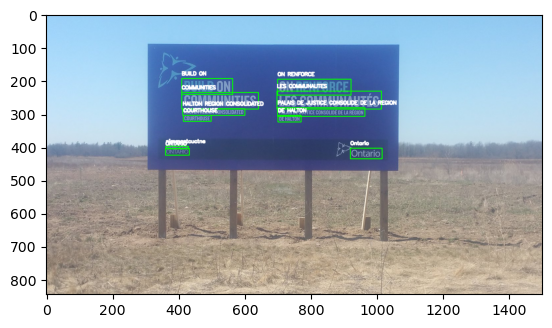

In [22]:
plt.imshow(img_rgb)

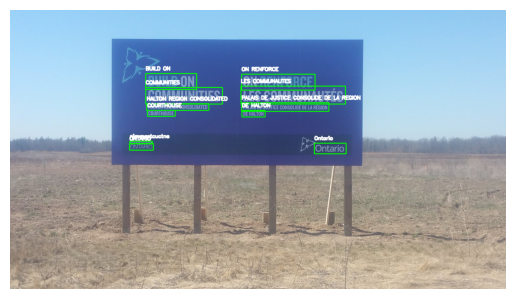

In [23]:
plt.imshow(img_rgb)
plt.axis('off')  # Turn off axes for better visualization
plt.show()

In [24]:
print(f"Text: {text}, Confidence: {confidence}")


Text: Ontario, Confidence: 0.9478011508458631


In [25]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

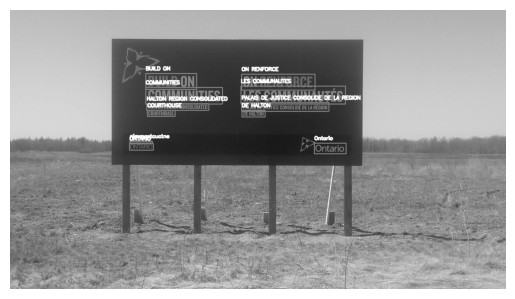

In [26]:
# Display the grayscale image
plt.imshow(gray, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

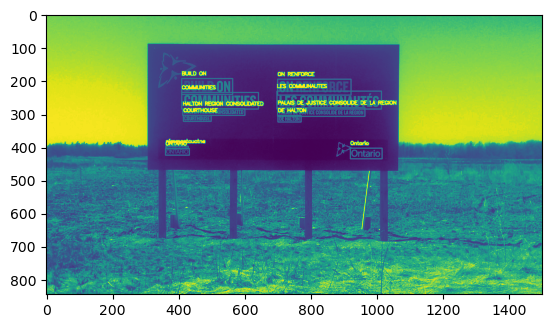

In [28]:
# Step 2: Increase Contrast
# Using histogram equalization to improve contrast
contrast = cv2.equalizeHist(gray)
plt.imshow(contrast)

In [29]:
# Step 3: Apply Thresholding
# Use adaptive thresholding for dynamic background handling
binary = cv2.adaptiveThreshold(
    contrast, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

In [30]:
# Step 4: Remove Noise (Optional)
kernel = np.ones((2, 2), np.uint8)
processed = cv2.dilate(binary, kernel, iterations=1)
processed = cv2.erode(processed, kernel, iterations=1)

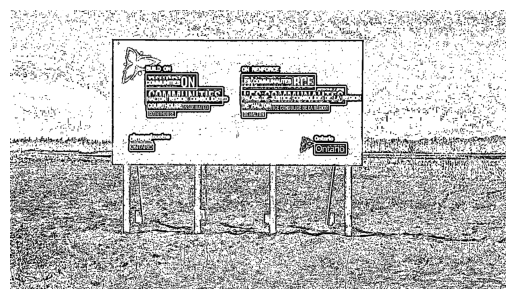

In [31]:
# Step 5: Display the Processed Image
plt.imshow(processed, cmap='gray')
plt.axis('off')
plt.show()

In [32]:
# Iterate over all detected text results
for detection in result:
    # Extract coordinates and text
    top_left = tuple(map(int, detection[0][0]))
    bottom_right = tuple(map(int, detection[0][2]))
    text = detection[1]  # Detected text
    confidence = detection[2]  # Confidence score

    # Draw a rectangle around the detected text
    img = cv2.rectangle(processed, top_left, bottom_right, (0, 255, 0), 2)
    # Put the detected text on the image
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.putText(img, text, (top_left[0], top_left[1] - 10), font, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

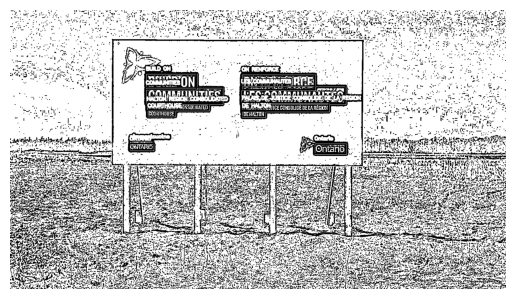

In [33]:
# Convert BGR to RGB for displaying with Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the result
plt.imshow(img_rgb)
plt.axis('off')  # Turn off axes for better visualization
plt.show()